---
    title: 'Manual RP: Superresolution Microscopy (with Python)'
    author: 
    - 'Bernd Rieger, b.rieger@tudelft.nl, room: F266'
    - 'Ronald Ligteringen, r.ligteringen@tudelft.nl, room: F261'
    date: 'June 26, 2019'
    toc: False
    colorlinks: 'blue'
    header-includes:
    - \usepackage{float}
    - \makeatletter
    - \def\fps@figure{H}
    - \makeatother
...

# Introduction

This manual will help you start up the python programming environment and use the two python scripts used in this practicum. Furthermore a few pointers are given on how to use the *DIPlib image processing* package for python.

The first chapter will give a **very** short introduction to different aspects of the python environment used in this practicum. Note this manual does not provide a course about python!

# Python, IPython, Jupyter and Anaconda

["Python](https://en.wikipedia.org/wiki/Python_(programming_language)) is an interpreted, high-level, general-purpose programming language" [Wikipedia]. Its functionality can easily be extended through the use of packages. Python can be used interactively - where every command is interpreted and executed per line - and with scripts. The scripts can be viewed as the Python *program* you are developing. Eventually executing the script will also be done in the same way as interactively: line-by-line. For every program (Python script) that is executed a new instance of Python is started with its own isolated environment. Default separate programs cannot access each others memory. These programs can run at the same time next to each other.

[IPython](https://en.wikipedia.org/wiki/IPython) is a command line program which provides a more powerfull interactive environment for Python. It includes graphics and allows for fast and convenient testing of Python code. It is also the core of the Jupyter project.

[Jupyter](https://en.wikipedia.org/wiki/Project_Jupyter) is a webbased application for running Python scripts (and other languages like Julia, R and more...) in a notepad environment. Jupyter also provides an easy to use filemanager to manage the scripts etc..

[Anaconda](https://en.wikipedia.org/wiki/Anaconda_(Python_distribution)) brings all these tools together in a package manager with a huge amount of packages readily available to extend Python.

More information on these packages will be given in the next chapter.

# Python packages

As noted before python packages extend the functionality of Python. Most of the packages are written in Python and maintained by enthousiastic developers. Typically these packages are imported at the start of a program. A small example is given:

In [3]:
import datetime as dt

print(dt.datetime.now())

2019-02-06 14:46:25.492227


This very small python program first imports a package named `datetime` and makes a reference to this package with the name `dt`. In the `print`-command the function `datetime.now()` *[give the current date and time]* from this package is called. More information about this package can be found here: <https://docs.python.org/3/library/datetime.html>

Other packages typically used in this practical are `PyDIP`, `numpy`, `matplotlib`, `ipywidgets` and `cv2` (a.k.a. `opencv`). To learn about these packages read the website given below and check their usage in the two scripts available in this practical: `show_movies` and `capture_movies`.

* <http://www.numpy.org/>
* <https://matplotlib.org/>
* <https://ipywidgets.readthedocs.io/en/stable/>
* <https://opencv-python-tutroals.readthedocs.io/>

The `PyDIP` package will be used to do all the image processing in this practical. It is part of *DIPlib* library for quantitative image analysis developed in our research group Quantitative Imaging. In the following chapter some of the functions available in `PyDIP` and necessary for this practical are described.

# PyDIP package

The purpose of this practical is to write a program to find locations of the different blobs you see in each time frame. These frames can be shown and recorded with `show_movies` and `capture_movies`. The file-format of the recorded image timeseries is **ICS**. This is the prefered format used in *DIPlib*: <https://svi-opensource.github.io/libics/>.

Below some recommendations are provided that can help you solve this task:

* use the DIPlib library with the python package PyDIP. The Windows environment on the Research Practicum Desktop in room F259 is prepared to use this package in python

In [4]:
import PyDIP as dip

* almost all functions available in DIPlib can be used via PyDIP. A description of these functions can be found here: <https://diplib.github.io/diplib-docs/>. You can also find a (sometimes very brief) description via the `help` function in python:

```python
help(dip)
```

* bring in the recorded images with `dip.ImageReadICS()`:

In [5]:
imgs = dip.ImageReadICS('C:/rp/diplib/images/chromo3d.ics')

*Note: IPython (Jupyter) allows for autocompletion with the [TAB] key! Also note the use of forward-slashes `/` in the filename.* 

* typically noise suppression can be done with the function `dip.Gauss()`. Use smoothing parameters like `[2, 2, 0]`. Note the zero as you do not want to smooth along the time axis.

* use a `for`-loop to iterate over all time frames of the recorded image timeseries
* the `dip.IsodataThreshold()` and `dip.Label()` functions can be used to segment the blobs from the background:

* to find the center of mass of the blobs you can use the function `dip.MeasurementTool.Measure()` together with a mask image (from the threshold) and the original intensity image. This very important `Measure` function also allows you to find the size of objects - *make use of that*

* you can store the found coordinates into an array for each time frame and add additional coordinates in the loop
* after you have localized all blobs and stored them in an array you can use the following snippet to generate an image from these coordinates:

```python
reconstruct = dip.Image(sizes=[640, 480], dt='SFLOAT')
reconstruct.Fill(0)
for ii in coordinates:
    reconstruct[round(ii[0]), round(ii[1])] += 1
```

Some useful functions:  
`Sizes()`, `Squeeze()`, `Fill()`, `Sum()`, `Overlay()`, `ContrastStretch()`, `Show()`

# Setting up the practical

1. after logging in with your netid go the the directory `c:\Users\<netid>` and create the directory `rp`. In this location you will store your programs and data
1. copy all `ipynb`- and `py`-files from `C:\rp\` to `c:\Users\<netid>\rp\`. These scripts can be used to show all images and record videos with the webcam. *Do not copy the `diplib` and `Movies` directories!*
1. start Jupyter via `Start Menu -> Anaconda3 -> Jupyter Notebook`
1. after the notebook-webpage has opened navigate to your `rp` directory in the filemanager
1. execute both the `show_movies.ipynb` notebook and the `capture_movies.ipynb` notebook to create your datafiles (movies)
    * check the code in both notebooks and adjust to your needs
    * check the key-commands for recording movies
    * **After pressing the 's'-key (save) in `capture_movies.ipynb` wait for the 'Saving...' message at the bottom of the window to disappear before closing the window otherwise the saved file will be corrupt!** Note that during the save-operation the window title might show '(Not responding)'. Please disregard this message and wait for the save-operation to finish.
    * note that both notebooks actually call python scripts. These scripts can also be started directly from the command line but need some small modifications to allow for parameters. To execute these scripts start `Start Menu -> Anaconda3 -> Anaconda Prompt` and for instance enter `python show_movies_anim.py`
1. create a new notebook to write your own program or use the Spyder IDE via `Start Menu -> Anaconda3 -> Spyder`

Finally, this is an **open** Research Practicum in the sense that you can decide for yourself on how to solve the problem. You do not need to use the given scripts. They can also be viewed as examples on how to develop your own solution!

# Using the DIPlib viewer

There are two ways to show images in PyDIP. The easiest way is to call the `Show()` method for any `dipimage`-object

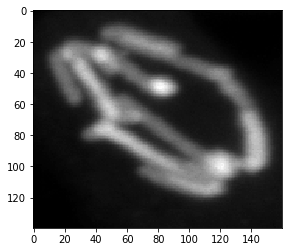

In [6]:
imgs.Show()

*Note: the `chromo3d.ics` file contains 16 frames and the `Show()` method squeezes and stretches these frames*

It is also possible to start the DIPlib viewer. For this you can use the following snippet

```python
dip.viewer.Show(imgs)
dip.viewer.Spin()
```

*Note: always call the `Spin()` function after `Show()` and always close the viewer window with `[CTRL]-w`*

Make sure you learn the different aspects of this viewer via this website: <https://diplib.github.io/diplib-docs/group__viewer.html>